# Playground for the gsaot poster

Hi, this is the place where you can experiment with `gsaot`!

The steps are the following:
1) Choose one of the models (or create one yourself), and run it. By default, this environment provides the following functions:
    * `sobol_fun` is the Sobol' G function with equation:
      $$
          Y = \prod_{j=1}^{d} \frac{|4X_j - 2| + a_j}{1 + a_j}, \text{ where }  X_j \sim U(0,1).
      $$
    * `ishi_homma_fun` is the Ishigami-Homma function with equation:
      $$
          Y = \sin(X_1) + A \sin^2(X_2) + B X_3^4 \sin(X_1), \text{ where } X_j \sim U(-\pi, \pi).
      $$
    * `bratley_fun` is the Bratley 1992 function with equation:
      $$
          Y = \sum_{i=1}^{k} (-1)^i \prod_{j=1}^{i} X_j,  \text{ where } X_j \sim U(0,1).
      $$
    * `gaussian_fun` is a Gaussian function with equation:
      $$
          \mathbf{Y} = A\mathbf{X}, \text{ where } A = \begin{bmatrix} 4 & 2 & 3 \\
                                                                       2 & 5 & -1 
                                                        \end{bmatrix}, \text{ and } \mathbf{X} \sim \mathcal{N}((1,1,1), \begin{bmatrix}
            1 & 0.5 & 0.5 \\
            0.5 & 1 & 0.5 \\
            0.5 & 0.5 & 1
          \end{bmatrix}).
      $$
   * `lotka_volterra_fun` is the Lotka-Volterra model with equations:
     $$
        \begin{aligned}
        \frac{dx}{dt} &= \alpha x - \beta x y \\
        \frac{dy}{dt} &= \delta x y - \gamma y.
        \end{aligned}
     $$
     The input distributions are: $x(0) \sim \mathcal{U}(10, 30), \quad y(0) \sim \mathcal{U}(5, 15), \quad \alpha \sim \mathcal{U}(0.5, 1.5), \quad \beta \sim \mathcal{U}(0.2, 0.6), \quad \delta \sim \mathcal{U}(0.05, 0.15), \quad \gamma \sim \mathcal{U}(0.3, 0.5)$.
   
   Each function receives as its first argument the number of realizations $N$ and returns a list with two elements: the input matrix $x$ and the output array (or matrix) $y$. Additionally, some functions receive as arguments also the other parameters of the function.
3) Use `gsaot`! You can explore different solvers and different functions.
4) Plot the indices and the separation measures.

In [1]:
models = list.files("R", full.names = T)
invisible(lapply(models, source))

In [2]:
library(gsaot)

## Example: the Sobol' G function

#### Step 1: Run the model

In [3]:
N <- 1000
sobol_data <- sobol_fun(N)

#### Step 2: Compute the OT-based indices

In [4]:
M <- 15
ot_indices <- ot_indices_1d(sobol_data[["x"]], sobol_data[["y"]], M)

#### Step 3: Plot the OT-based indices

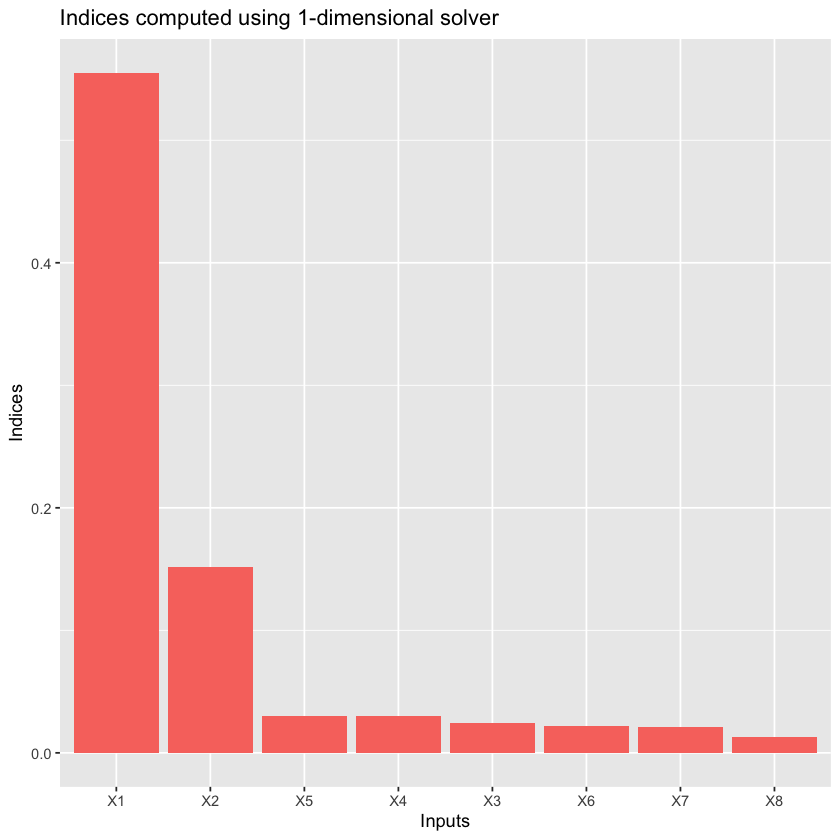

In [5]:
plot(ot_indices)

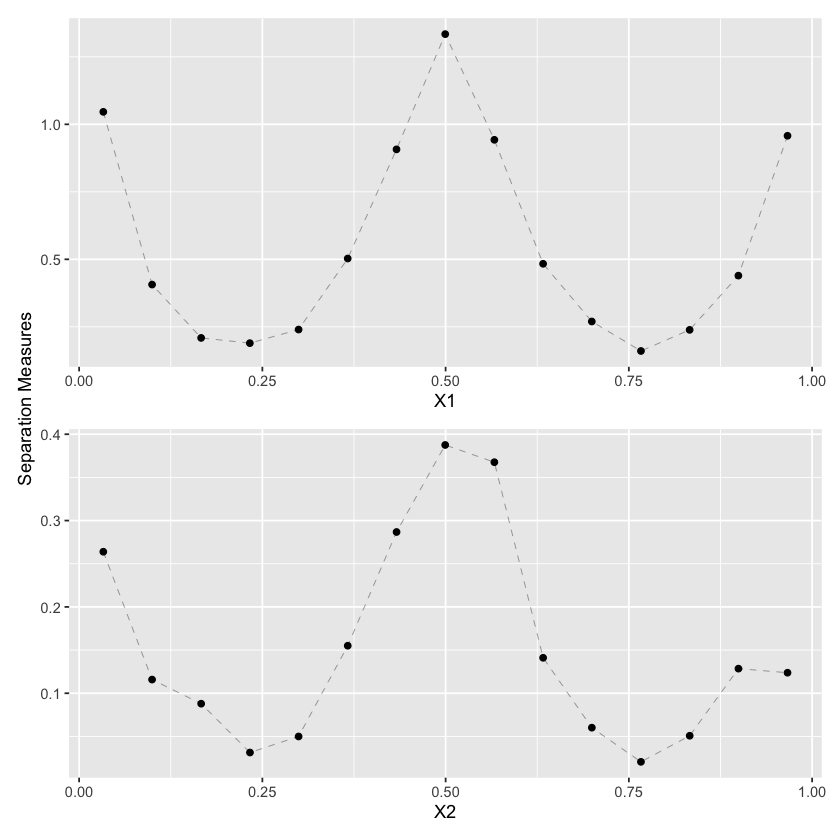

In [6]:
plot_separations(ot_indices, ranking = 2)